In [1]:
import numpy as np 
import pandas as pd 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# let's delete the two unnecessary columns
df.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [4]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


B    357
M    212
Name: diagnosis, dtype: int64


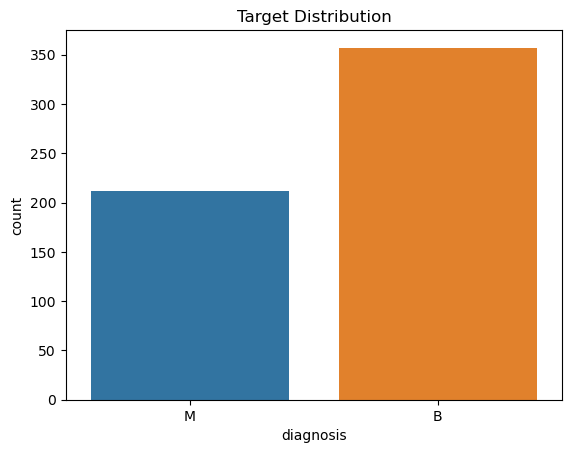

In [6]:
# target variable distribution
print(df.diagnosis.value_counts())
sns.countplot(x = df.diagnosis);
plt.title("Target Distribution")
plt.show()

In [7]:
# numeric transformation of target variable
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# checking for null values

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# checking for null values

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

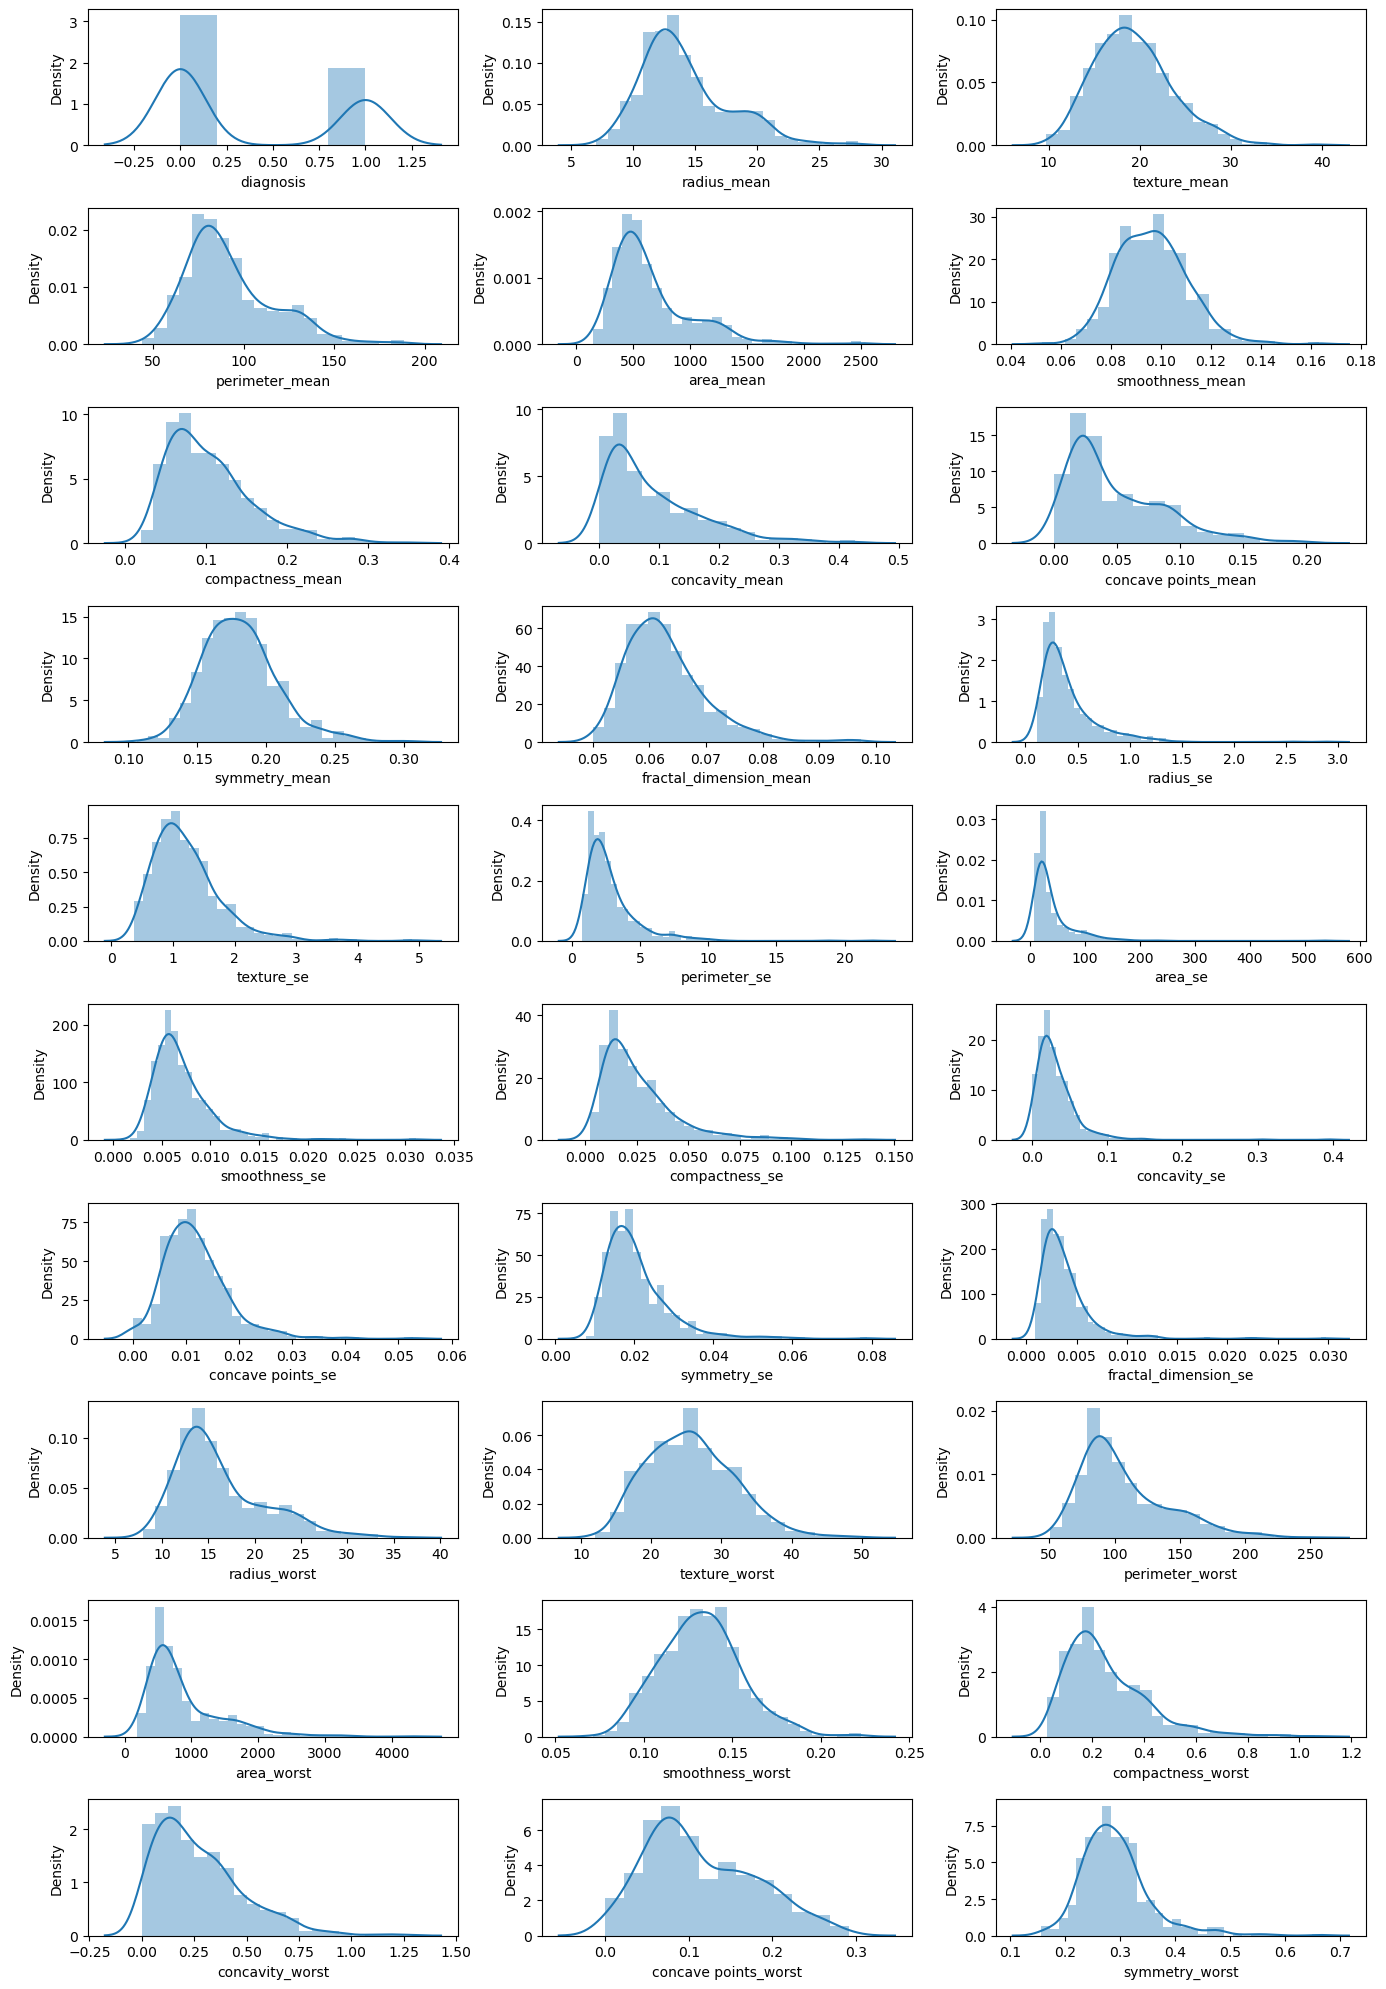

In [10]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

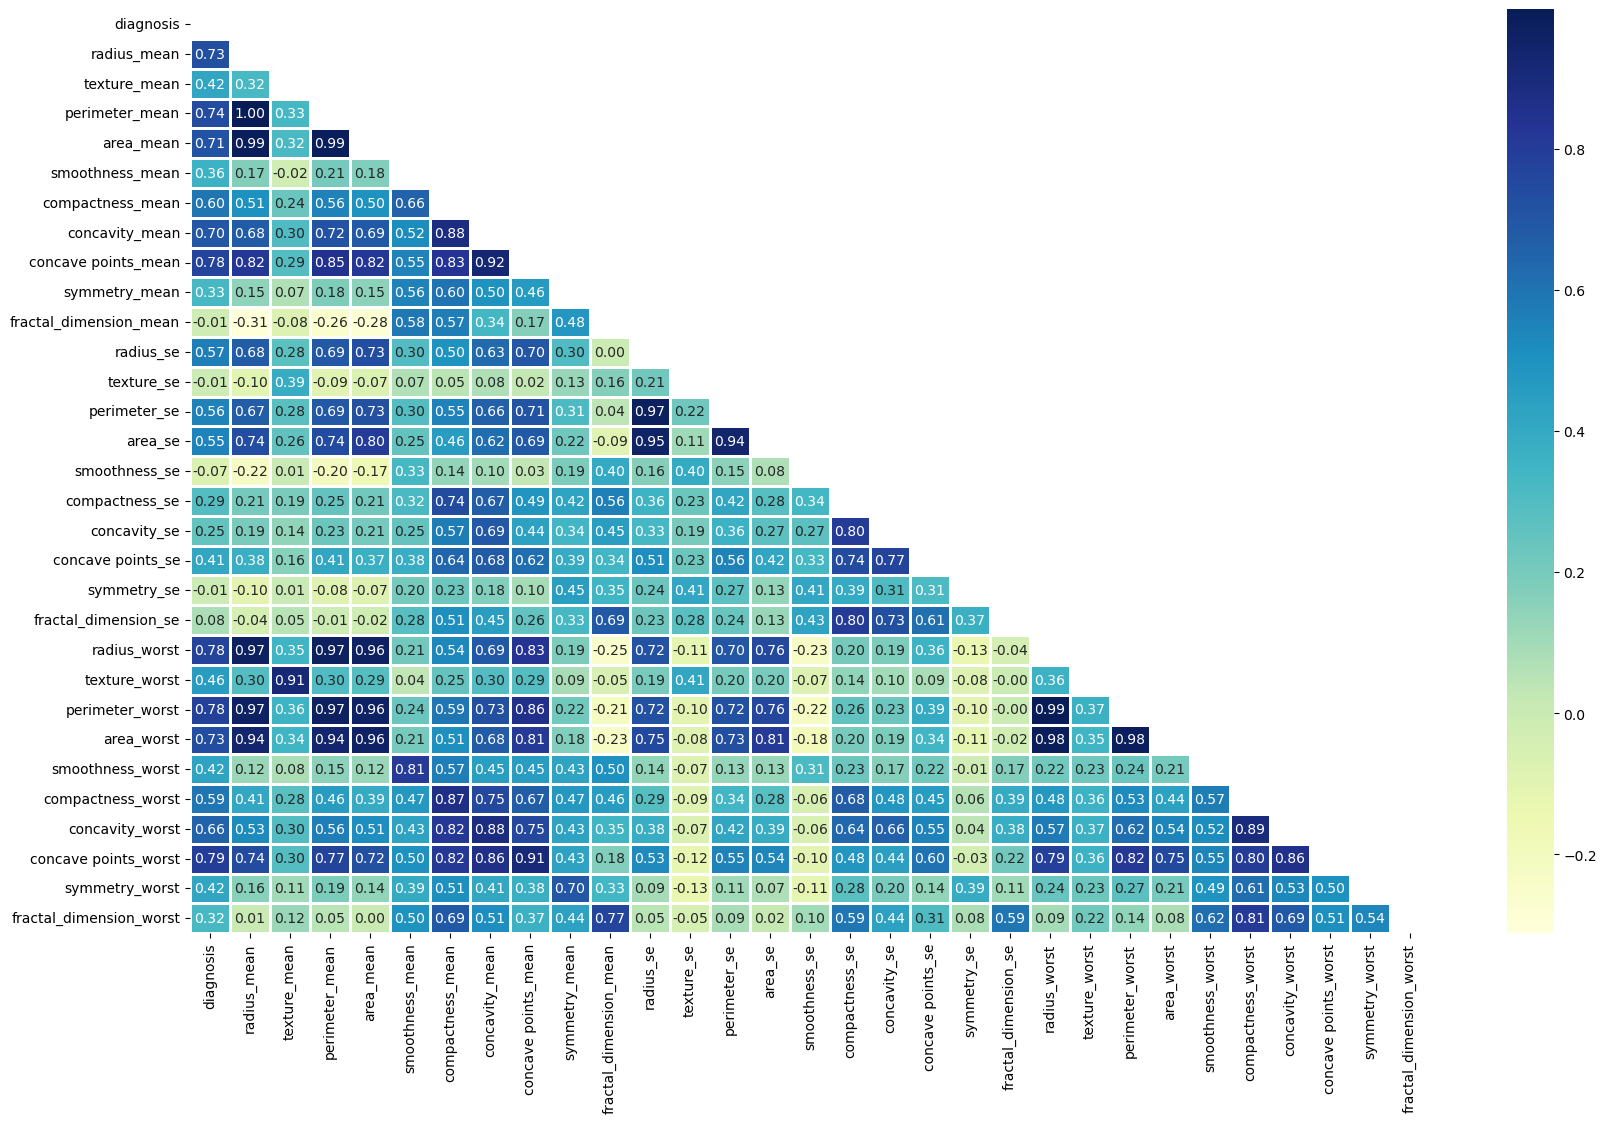

In [11]:
# Let's check the correlation between the variables 

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='YlGnBu')
plt.show()

In [12]:
# features with higher than threshold(0.96) correlation
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

high_corr = [x for x in tri_df.columns if any(tri_df[x] > 0.96)]

In [13]:
high_corr

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'radius_worst',
 'perimeter_worst']

In [14]:
# I selected 4 features by comparing the output of high_corr with the corr graph
df = df.drop(["perimeter_mean","area_mean","radius_mean","radius_worst"], axis = 1)

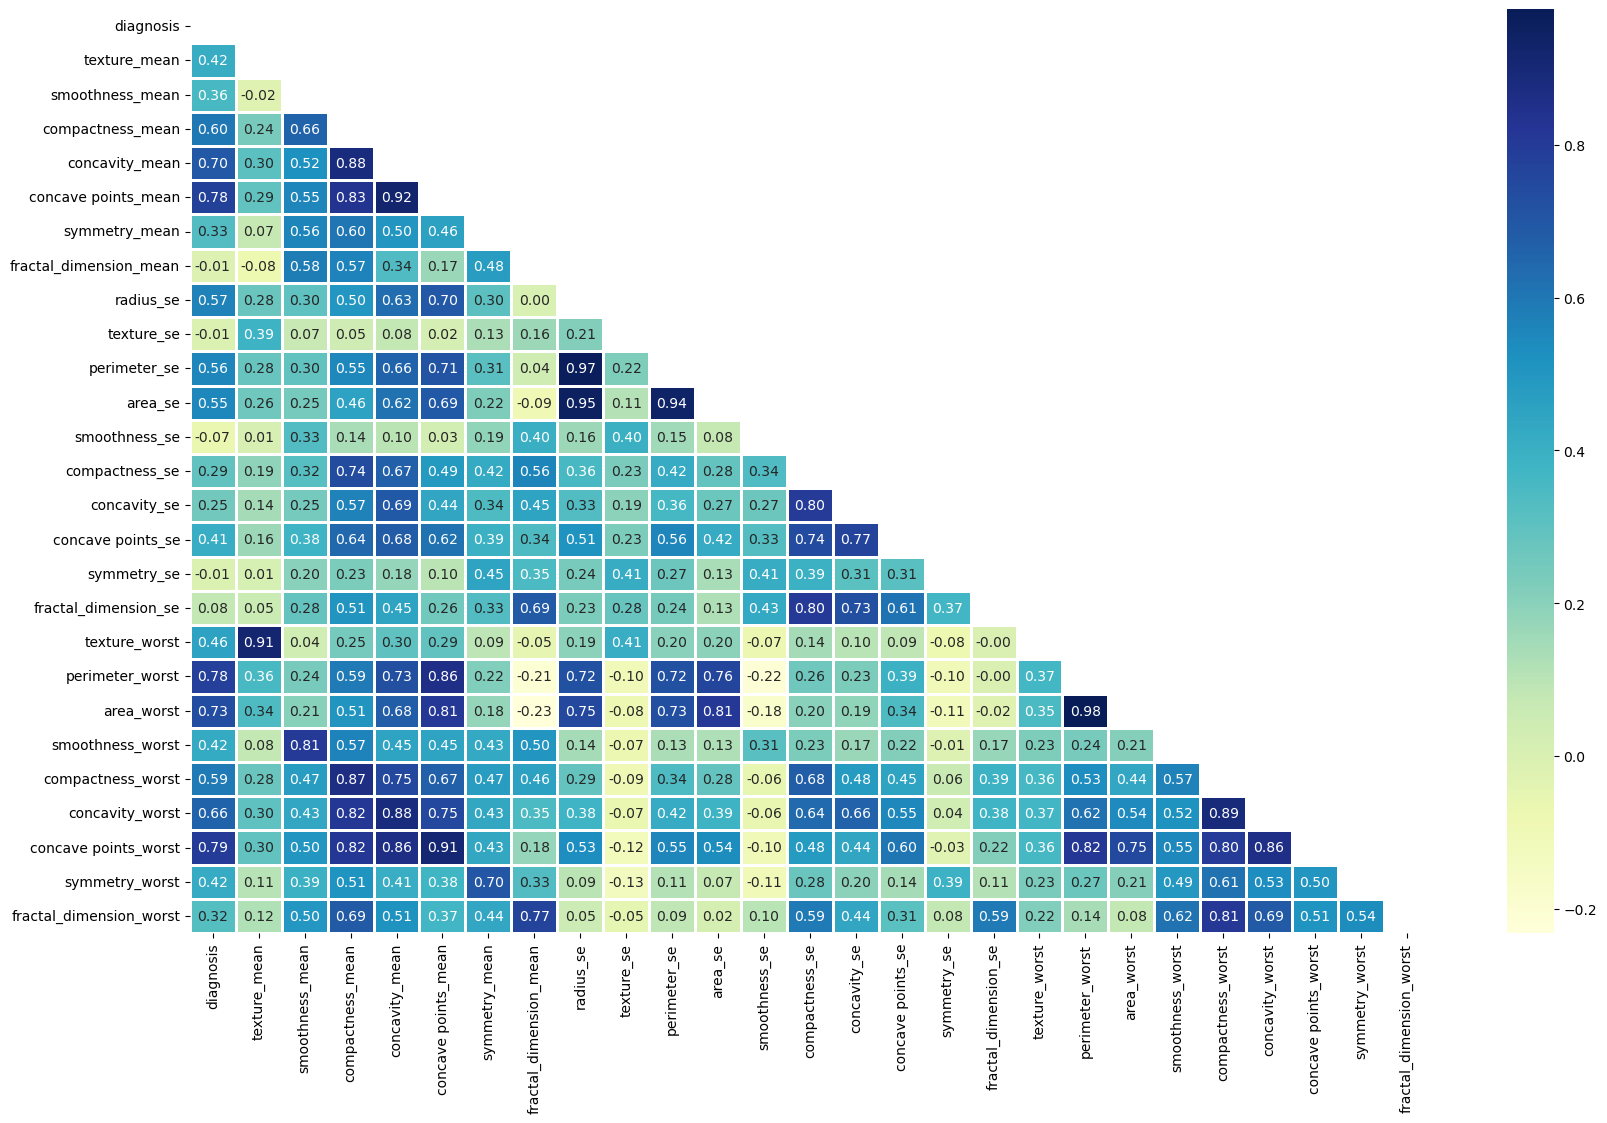

In [15]:
# correlation after drop
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='YlGnBu')
plt.show()

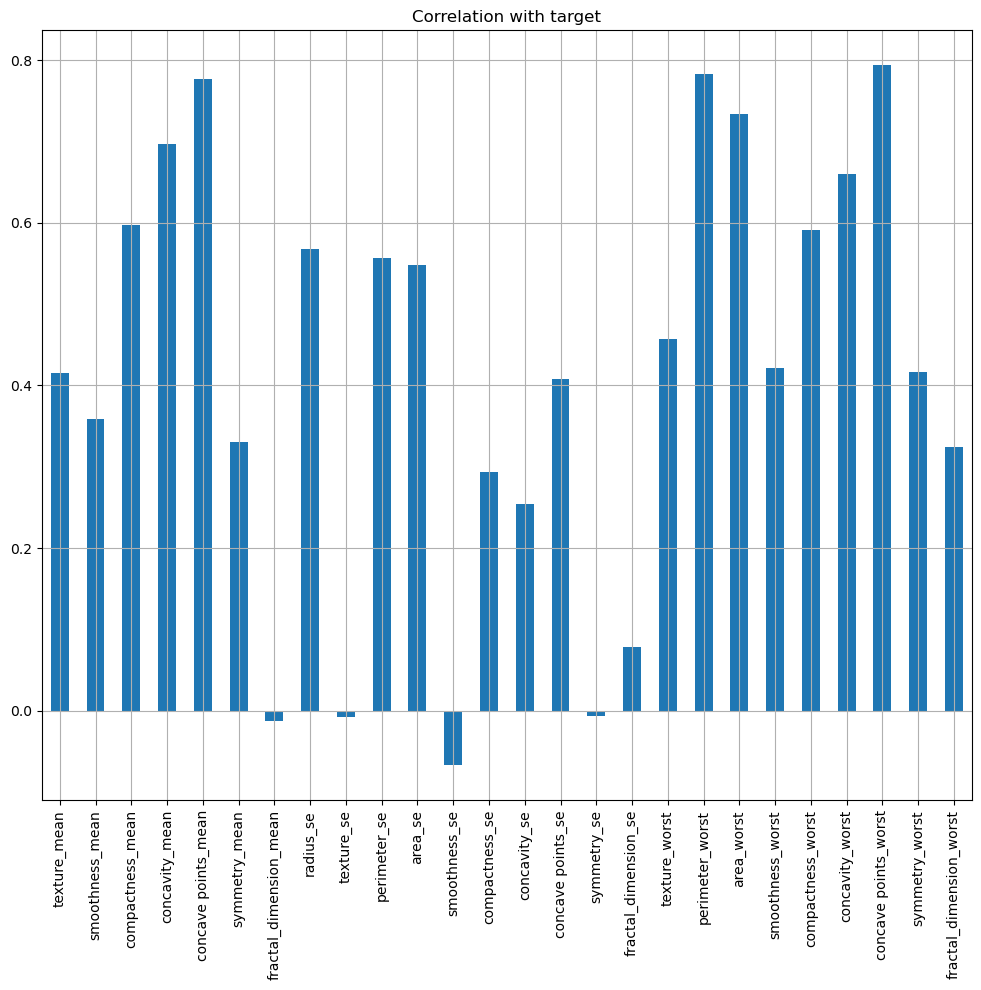

In [16]:
# Correlation with target
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target");

In [17]:
# scalar process to observe outliers in a single graph
scaler = StandardScaler()
scaler

StandardScaler()

In [18]:
scaled_array = scaler.fit_transform(df.iloc[:,1:])
scaled_array

array([[-2.07333501,  1.56846633,  3.28351467, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.35363241, -0.82696245, -0.48707167, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.45618695,  0.94221044,  1.05292554, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 2.0455738 , -0.84048388, -0.03867967, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 2.33645719,  1.52576706,  3.27214378, ...,  2.28998549,
         1.91908301,  2.21963528],
       [ 1.22179204, -3.11208479, -1.15075248, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [19]:
df1 = pd.DataFrame(scaled_array, columns = df.iloc[:,1:].columns)

In [20]:
df1 = pd.concat([df1, df.loc[:, "diagnosis"]], axis = 1)
df1.head(3)

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1


In [21]:
from collections import Counter 

In [22]:
def detect_outliers(df,features):             
    outlier_indices = []                      
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)       
                                                                                
            
    outlier_indices = Counter(outlier_indices)         
    # adds to the list if there are more than 9 outliers in the sample                                                   
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 9)   
                                                                               
    return multiple_outliers 

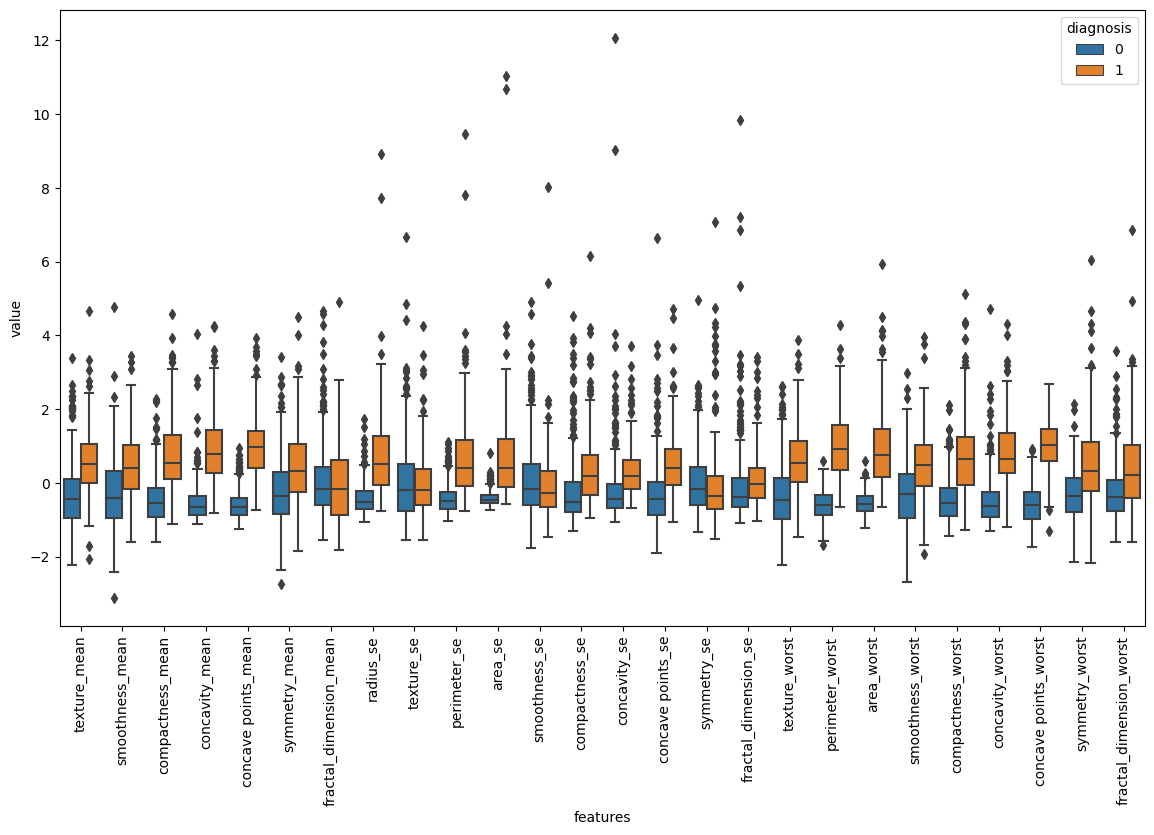

In [23]:
data_melted = pd.melt(df1, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (14,8))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [24]:
df1.loc[detect_outliers(df1,
      ['texture_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])]

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
3,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
122,0.211845,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,3.983947,3.452962,3.435978,...,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673,1
12,1.282296,0.073992,2.680858,1.477729,1.621948,2.137194,2.155097,1.986249,4.265788,4.061202,...,0.694167,1.323647,0.793551,-1.256713,0.865372,0.439988,0.945477,0.445285,1.017112,1
78,1.089149,2.294354,4.568425,3.598263,2.875535,3.995524,2.639918,1.900350,1.212248,2.862733,...,0.984029,1.877663,1.305104,1.382207,2.303684,2.379147,2.073768,4.107940,0.869706,1
108,0.088510,2.579016,3.268353,4.238567,3.440423,2.717694,1.076300,2.922839,0.595371,3.556271,...,0.379878,2.964846,2.600686,1.653990,2.833589,3.303630,2.685877,1.867314,0.772728,1
152,-0.919110,0.771413,1.052926,4.042709,0.764814,2.688487,4.275833,1.513443,2.625622,0.597473,...,-1.007551,-1.078879,-0.879102,-0.138898,0.145898,2.635815,0.647036,0.335276,2.324925,0


In [25]:
# drop outliers

df1 = df1.drop(detect_outliers(df1,
                          ['texture_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']),axis = 0).reset_index(drop = True)

In [26]:
df1.shape

(563, 27)

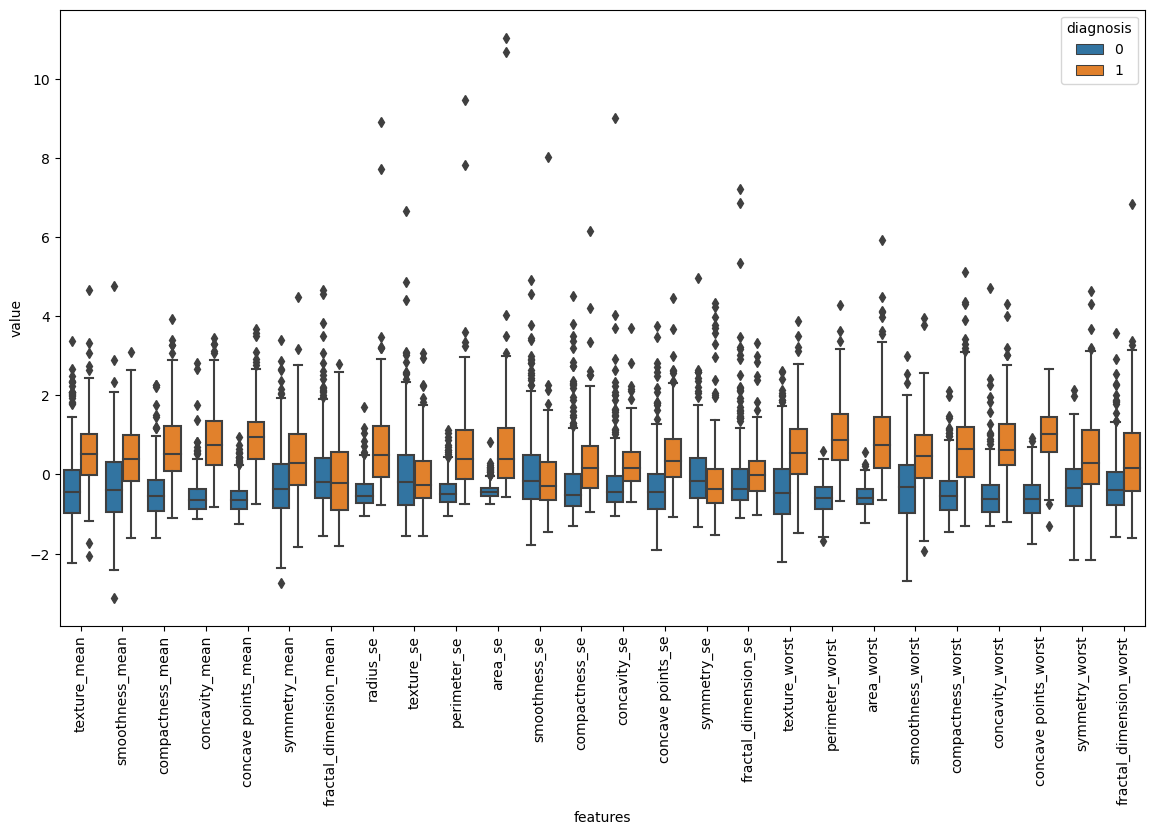

In [27]:
# graph after outliers are removed
data_melted = pd.melt(df1, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (14,8))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [28]:
y=df1["diagnosis"]
X=df1.drop(["diagnosis"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# model predictions
y_pred = log_reg.predict(X_test)
print("*****LogisticRegression******\n")
print("Train score:")
print(accuracy_score(y_train, log_reg.predict(X_train)))
print("Test score:")
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
# confusion matrix
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))

*****LogisticRegression******

Train score:
0.9898477157360406
Test score:
0.9704142011834319
Accuracy Score:
[[97  0]
 [ 5 67]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        97
           1       1.00      0.93      0.96        72

    accuracy                           0.97       169
   macro avg       0.98      0.97      0.97       169
weighted avg       0.97      0.97      0.97       169



In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("******KNeighborsClassifier******\n")
# accuracy score
print("Train score:")
print(accuracy_score(y_train, knn.predict(X_train)))
print("Test score:")
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
# confusion matrix
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))

******KNeighborsClassifier******

Train score:
0.9771573604060914
Test score:
0.9526627218934911
Accuracy Score:
[[94  3]
 [ 5 67]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        97
           1       0.96      0.93      0.94        72

    accuracy                           0.95       169
   macro avg       0.95      0.95      0.95       169
weighted avg       0.95      0.95      0.95       169



In [31]:
svc = SVC()
svc.fit(X_train, y_train)
# model predictions 
y_pred = svc.predict(X_test)
print("******Support Vector Classifier******\n")
# accuracy score
print("Train score:")
print(accuracy_score(y_train, svc.predict(X_train)))
print("Test score:")
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
# confusion matrix
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))

******Support Vector Classifier******

Train score:
0.9822335025380711
Test score:
0.9822485207100592
Accuracy Score:
[[97  0]
 [ 3 69]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.96      0.98        72

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169



In [32]:
# Results of Outlier-1 (boxplot method)
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC'],
    'Score': [log_reg_acc, knn_acc, svc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.982249
0,Logistic Regression,0.970414
1,KNN,0.952663


In [33]:
y = df.diagnosis
X = df.drop(["diagnosis"],axis = 1)
columns = X.columns.tolist()

In [34]:
clf = LocalOutlierFactor()
y_pred_lof = clf.fit_predict(X)         # Returns -1 for anomalies/outliers and 1 for inliers.         
X_score = clf.negative_outlier_factor_

In [36]:
np.unique(y_pred_lof, return_counts=True)     # There are 22 outliers

(array([-1,  1]), array([ 22, 547], dtype=int64))

In [37]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [38]:
# according to this output we can set the threshold value
outlier_score["score"].nsmallest(30)

461   -3.718624
38    -3.455218
265   -2.341918
101   -2.089714
352   -2.077498
180   -2.048867
368   -2.030726
290   -1.959995
212   -1.786157
236   -1.785316
339   -1.746671
275   -1.729520
191   -1.720679
23    -1.629499
503   -1.627936
521   -1.620917
82    -1.598332
471   -1.561455
219   -1.528778
18    -1.510505
539   -1.508829
297   -1.504001
164   -1.499279
272   -1.487644
152   -1.461420
108   -1.448794
258   -1.421608
528   -1.407015
473   -1.402815
407   -1.326193
Name: score, dtype: float64

In [39]:
threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
outlier_index

[38, 101, 180, 265, 352, 368, 461]

In [40]:
# drop outliers
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

In [41]:
X.shape

(562, 26)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# model predictions
y_pred = log_reg.predict(X_test)
print("*****LogisticRegression******\n")
print("Train score:")
print(accuracy_score(y_train, log_reg.predict(X_train)))
print("Test score:")
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
# confusion matrix
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))

*****LogisticRegression******

Train score:
0.9847328244274809
Test score:
0.9822485207100592
Accuracy Score:
[[111   1]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.98      0.96      0.97        57

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169



In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("******KNeighborsClassifier******\n")
# accuracy score
print("Train score:")
print(accuracy_score(y_train, knn.predict(X_train)))
print("Test score:")
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
# confusion matrix
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))

******KNeighborsClassifier******

Train score:
0.9694656488549618
Test score:
0.9763313609467456
Accuracy Score:
[[111   1]
 [  3  54]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       112
           1       0.98      0.95      0.96        57

    accuracy                           0.98       169
   macro avg       0.98      0.97      0.97       169
weighted avg       0.98      0.98      0.98       169



In [45]:
svc = SVC()
svc.fit(X_train, y_train)
# model predictions 
y_pred = svc.predict(X_test)
print("******Support Vector Classifier******\n")
# accuracy score
print("Train score:")
print(accuracy_score(y_train, svc.predict(X_train)))
print("Test score:")
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
# confusion matrix
print("Accuracy Score:")
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))

******Support Vector Classifier******

Train score:
0.989821882951654
Test score:
0.9881656804733728
Accuracy Score:
[[112   0]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.96      0.98        57

    accuracy                           0.99       169
   macro avg       0.99      0.98      0.99       169
weighted avg       0.99      0.99      0.99       169



In [46]:
# Results of Outlier-2 (LOF Method)
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC'],
    'Score': [log_reg_acc, knn_acc, svc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.988166
0,Logistic Regression,0.982249
1,KNN,0.976331


In [47]:
def models(X_train, X_test, y_train, y_test):
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    # model predictions
    y_pred = log_reg.predict(X_test)
    print("*****LogisticRegression******\n")
    print("Train score:")
    print(accuracy_score(y_train, log_reg.predict(X_train)))
    print("Test score:")
    log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
    print(log_reg_acc)
    # confusion matrix
    print("Accuracy Score:")
    print(confusion_matrix(y_test, y_pred))
    # classification report
    print(classification_report(y_test, y_pred))
    print("*"*60)
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("******KNeighborsClassifier******\n")
    # accuracy score
    print("Train score:")
    print(accuracy_score(y_train, knn.predict(X_train)))
    print("Test score:")
    knn_acc = accuracy_score(y_test, knn.predict(X_test))
    print(knn_acc)
    # confusion matrix
    print("Accuracy Score:")
    print(confusion_matrix(y_test, y_pred))
    # classification report
    print(classification_report(y_test, y_pred))
    print("*"*60)
    svc = SVC()
    svc.fit(X_train, y_train)
    # model predictions 
    y_pred = svc.predict(X_test)
    print("******Support Vector Classifier******\n")
    # accuracy score
    print("Train score:")
    print(accuracy_score(y_train, svc.predict(X_train)))
    print("Test score:")
    svc_acc = accuracy_score(y_test, svc.predict(X_test))
    print(svc_acc)
    # confusion matrix
    print("Accuracy Score:")
    print(confusion_matrix(y_test, y_pred))
    # classification report
    print(classification_report(y_test, y_pred))

In [48]:
def models(X_train, X_test, y_train, y_test):
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    # model predictions
    y_pred = log_reg.predict(X_test)
    print("*****LogisticRegression******\n")
    print("Train score:")
    print(accuracy_score(y_train, log_reg.predict(X_train)))
    print("Test score:")
    log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
    print(log_reg_acc)
    # confusion matrix
    print("Accuracy Score:")
    print(confusion_matrix(y_test, y_pred))
    # classification report
    print(classification_report(y_test, y_pred))
    print("*"*60)
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("******KNeighborsClassifier******\n")
    # accuracy score
    print("Train score:")
    print(accuracy_score(y_train, knn.predict(X_train)))
    print("Test score:")
    knn_acc = accuracy_score(y_test, knn.predict(X_test))
    print(knn_acc)
    # confusion matrix
    print("Accuracy Score:")
    print(confusion_matrix(y_test, y_pred))
    # classification report
    print(classification_report(y_test, y_pred))
    print("*"*60)
    svc = SVC()
    svc.fit(X_train, y_train)
    # model predictions 
    y_pred = svc.predict(X_test)
    print("******Support Vector Classifier******\n")
    # accuracy score
    print("Train score:")
    print(accuracy_score(y_train, svc.predict(X_train)))
    print("Test score:")
    svc_acc = accuracy_score(y_test, svc.predict(X_test))
    print(svc_acc)
    # confusion matrix
    print("Accuracy Score:")
    print(confusion_matrix(y_test, y_pred))
    # classification report
    print(classification_report(y_test, y_pred))

In [49]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 5)        # option n_components = 4 worked better than n_components = 2
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2","p3","p4","p5"])
pca_data["target"] = y

In [50]:
X_reduced_pca

array([[ 9.40798326, -0.46094987, -0.83324488,  4.04118211, -1.03318781],
       [ 0.56880649, -2.96336386, -0.39143161,  1.18323691,  0.63867782],
       [ 4.85304153, -1.87115007, -0.42541055,  1.08625149, -0.16385725],
       ...,
       [ 0.57480791, -2.01040795,  0.54603535, -2.06727399,  1.75162224],
       [10.05251971, -0.63176592, -1.89469575, -2.20109469, -0.15163619],
       [-4.66429606, -0.58027516,  1.51450263, -2.191474  , -0.2486671 ]])

In [51]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.30, random_state = 42)

In [52]:
models(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

*****LogisticRegression******

Train score:
0.9770992366412213
Test score:
0.9585798816568047
Accuracy Score:
[[107   5]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       112
           1       0.92      0.96      0.94        57

    accuracy                           0.96       169
   macro avg       0.95      0.96      0.95       169
weighted avg       0.96      0.96      0.96       169

************************************************************
******KNeighborsClassifier******

Train score:
0.9720101781170484
Test score:
0.9704142011834319
Accuracy Score:
[[110   2]
 [  3  54]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       112
           1       0.96      0.95      0.96        57

    accuracy                           0.97       169
   macro avg       0.97      0.96      0.97       169
weighted avg       0.97      0.97      0.97       169

****************

In [53]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

nca = NeighborhoodComponentsAnalysis(n_components = 4, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["n1","n2","n3","n4"])
nca_data["target"] = y

In [54]:
nca_data

,n1,n2,n3,n4,target
0,23.008451,-38.103821,-8.274475,-3.831054,1
1,6.794895,-19.875446,-8.562775,1.505890,1
2,17.956403,-27.759287,-5.579369,-3.740156,1
3,10.138682,-2.574889,3.412902,-22.860909,1
4,15.753842,-20.516797,-1.251768,7.885948,1
...,...,...,...,...,...
557,32.189809,-38.430990,-1.997278,1.304572,1
558,21.832632,-22.461434,-2.353424,-9.444103,1
559,3.829989,-8.080678,-0.479038,-6.592477,1
560,28.966186,-41.339595,-3.218213,-22.452856,1


In [55]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.30, random_state = 42)

In [56]:
models(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

*****LogisticRegression******

Train score:
0.9872773536895675
Test score:
0.9822485207100592
Accuracy Score:
[[111   1]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.98      0.96      0.97        57

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169

************************************************************
******KNeighborsClassifier******

Train score:
0.9949109414758269
Test score:
0.9881656804733728
Accuracy Score:
[[112   0]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.96      0.98        57

    accuracy                           0.99       169
   macro avg       0.99      0.98      0.99       169
weighted avg       0.99      0.99      0.99       169

****************

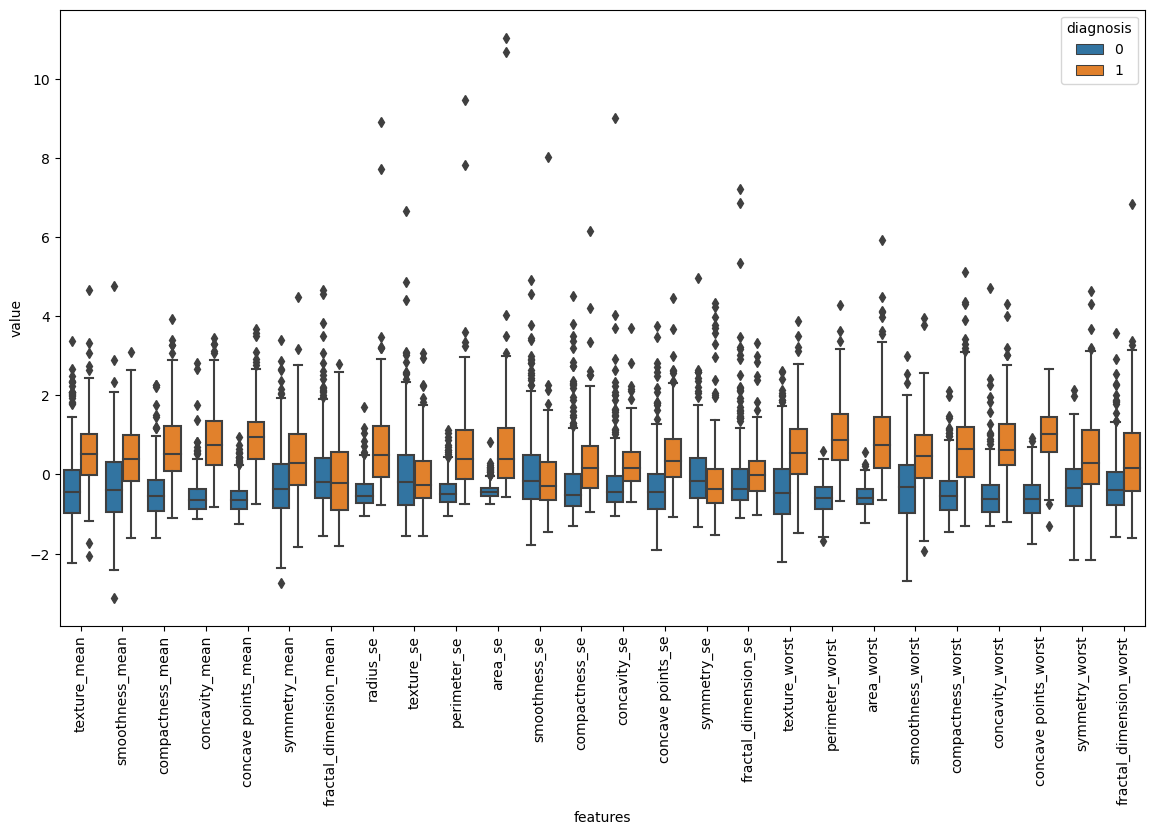

In [57]:
data_melted = pd.melt(df1, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (14,8))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [58]:
df1.loc[detect_outliers(df1,
      ['texture_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])]

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
252,0.909965,1.034726,3.924075,2.872586,2.290012,2.494987,2.586049,3.200748,2.244609,3.590923,...,0.971001,1.085360,0.607213,0.790423,1.672634,1.659519,2.003725,0.608681,0.994946,1


In [59]:
# drop outliers

df1 = df1.drop(detect_outliers(df1,
                          ['texture_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']),axis = 0).reset_index(drop = True)

In [60]:
df1.shape

(561, 27)

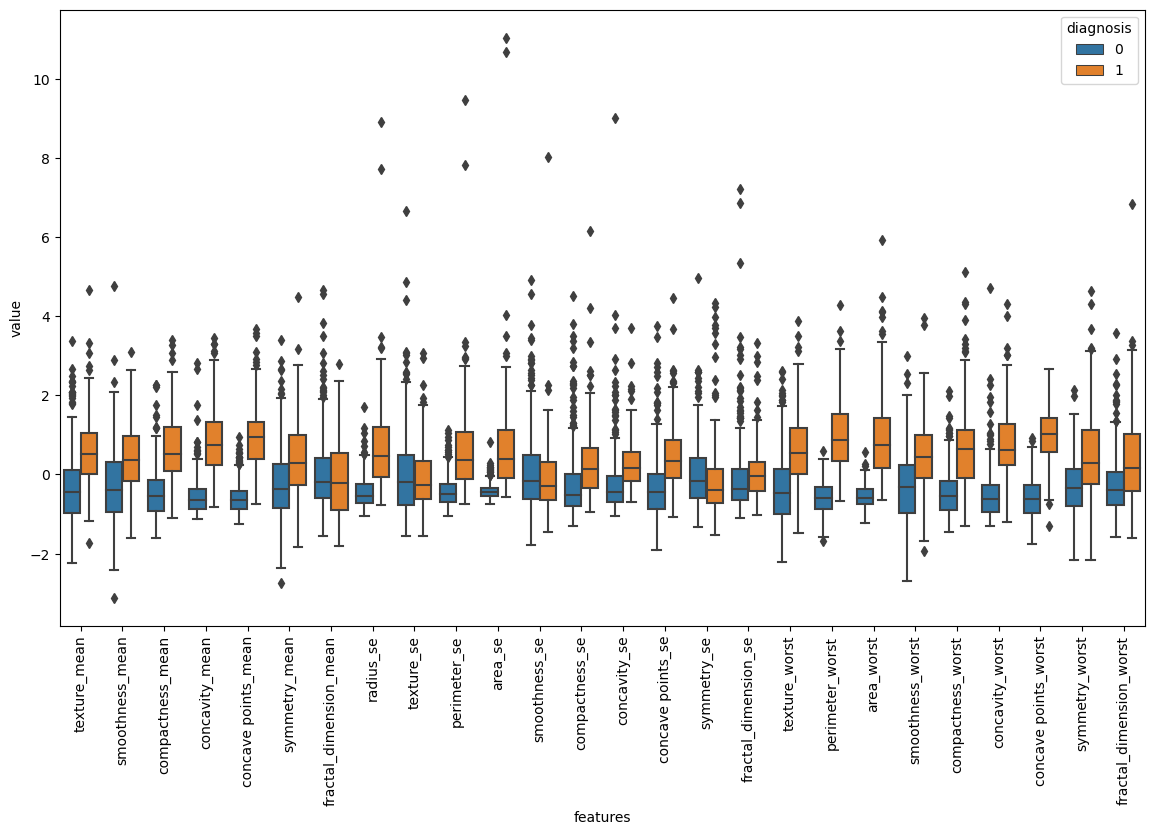

In [61]:
# graph after outliers are removed
data_melted = pd.melt(df1, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (14,8))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [62]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

nca = NeighborhoodComponentsAnalysis(n_components = 4, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["n1","n2","n3","n4"])
nca_data["target"] = y

In [63]:
nca_data

,n1,n2,n3,n4,target
0,23.008451,-38.103821,-8.274475,-3.831054,1
1,6.794895,-19.875446,-8.562775,1.505890,1
2,17.956403,-27.759287,-5.579369,-3.740156,1
3,10.138682,-2.574889,3.412902,-22.860909,1
4,15.753842,-20.516797,-1.251768,7.885948,1
...,...,...,...,...,...
557,32.189809,-38.430990,-1.997278,1.304572,1
558,21.832632,-22.461434,-2.353424,-9.444103,1
559,3.829989,-8.080678,-0.479038,-6.592477,1
560,28.966186,-41.339595,-3.218213,-22.452856,1


In [64]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.30, random_state = 42)

In [65]:
models(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

*****LogisticRegression******

Train score:
0.9872773536895675
Test score:
0.9822485207100592
Accuracy Score:
[[111   1]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.98      0.96      0.97        57

    accuracy                           0.98       169
   macro avg       0.98      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169

************************************************************
******KNeighborsClassifier******

Train score:
0.9949109414758269
Test score:
0.9881656804733728
Accuracy Score:
[[112   0]
 [  2  55]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.96      0.98        57

    accuracy                           0.99       169
   macro avg       0.99      0.98      0.99       169
weighted avg       0.99      0.99      0.99       169

****************